# **Customer Segmentation (Clustering)**
original file: https://colab.research.google.com/drive/1gq8Nu_lINQVCqraWDHLAr5ib1dnRB22b?usp=sharing

# **Segmentation Pipeline**
1. Get data
2. Data preprocessing
3. Extract feature
4. Model
5. Visualization
6. Interpretation (การตีความ)

# Get Data

http://www.michelecoscia.com/?page_id=379

In [ ]:
# Download from google drive
# https://drive.google.com/uc?id=1MLYSc0BBAy3fOJl7LrJ0b7N6oVyeC-PC

!gdown --id 1MLYSc0BBAy3fOJl7LrJ0b7N6oVyeC-PC

Downloading...
From: https://drive.google.com/uc?id=1MLYSc0BBAy3fOJl7LrJ0b7N6oVyeC-PC
To: /content/supermarket_data.zip
55.1MB [00:00, 57.0MB/s]


In [ ]:
!unzip supermarket_data.zip

Archive:  supermarket_data.zip
replace df_purchases.p? [y]es, [n]o, [A]ll, [N]one, [r]ename: ืn
error:  invalid response [ืn]
replace df_purchases.p? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


# Data preprocessing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# create dataframe from pickle file
df_purchases = pd.read_pickle('df_purchases.p')
df_distances = pd.read_pickle('df_distances.p')
df_prices = pd.read_pickle('df_prices.p')

In [ ]:
display(df_purchases.sample(5))
display(df_distances.sample(5))
display(df_prices.sample(5))

,customer_id,product_id,shop_id,quantity
18462675,42979,3656,1,2
9110272,21903,1148,2,1
4886154,11863,2096,1,1
1535525,3772,1005,2,1
7452771,18043,112,1,10


,customer_id,shop_id,distance
299030,59807,1,3661.665604
107596,21520,2,3851.351912
142564,28513,5,2169.988481
43991,8799,2,101.166944
67958,13592,4,3427.626982


,product_id,price
3308,3309,124.9
2721,2722,365.7
3220,3221,53.8
797,798,125.5
3768,3769,322.3


In [ ]:
df_purchases.isnull().sum()

customer_id    0
product_id     0
shop_id        0
quantity       0
dtype: int64

In [ ]:
df_purchases.info()
df_distances.info()
df_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24638725 entries, 0 to 24638724
Data columns (total 4 columns):
 #   Column       Dtype
---  ------       -----
 0   customer_id  int64
 1   product_id   int64
 2   shop_id      int64
 3   quantity     int64
dtypes: int64(4)
memory usage: 751.9 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301830 entries, 0 to 301829
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   customer_id  301830 non-null  int64  
 1   shop_id      301830 non-null  int64  
 2   distance     301830 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 6.9 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4567 entries, 0 to 4566
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   product_id  4567 non-null   int64  
 1   price       4567 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 71.5 KB


In [ ]:
# function for merging 3 dataframe

def preprocess_purchases_prices_distances():

  # join df_purchases and df_prices using product_id as key
  output = pd.merge(df_purchases, df_prices, how='left', on='product_id')
  output['amount'] = output['quantity']*output['price']

  # join df_purchases, df_prices and df_distances  using customer_id, shop_id as key
  output = pd.merge(output, df_distances, how='left', on=['customer_id', 'shop_id'])

  # create new column counting the transaction
  output['cnt_txn'] = 1

  return output

In [ ]:
df_trans = preprocess_purchases_prices_distances()

In [ ]:
df_trans

,customer_id,product_id,shop_id,quantity,price,amount,distance,cnt_txn
0,1,112,1,3,16.70,50.10,4082.522163,1
1,1,112,2,16,16.70,267.20,985.876199,1
2,1,113,2,2,13.45,26.90,985.876199,1
3,1,114,2,1,17.20,17.20,985.876199,1
4,1,133,1,1,52.40,52.40,4082.522163,1
...,...,...,...,...,...,...,...,...
24638720,60365,3894,1,3,131.85,395.55,1727.251996,1
24638721,60365,3896,1,1,62.25,62.25,1727.251996,1
24638722,60365,3897,1,1,97.95,97.95,1727.251996,1
24638723,60366,1514,1,1,567.50,567.50,1025.586656,1


In [ ]:
df_trans['distance']

0           4082.522163
1            985.876199
2            985.876199
3            985.876199
4           4082.522163
               ...     
24638720    1727.251996
24638721    1727.251996
24638722    1727.251996
24638723    1025.586656
24638724    1025.586656
Name: distance, Length: 24638725, dtype: float64

In [ ]:
df_trans.sample(10)

,customer_id,product_id,shop_id,quantity,price,amount,distance,cnt_txn
18254234,42514,630,1,1,1298.80,1298.80,1838.491609,1
23271784,55020,2749,1,1,204.45,204.45,3569.811934,1
8256891,19916,1698,2,1,64.85,64.85,1328.884099,1
6682468,16267,1185,1,1,207.40,207.40,2909.469583,1
17690887,41278,1934,2,1,109.00,109.00,1500.264830,1
7565938,18325,4231,1,2,76.20,152.40,868.744074,1
8778241,21183,150,2,2,66.40,132.80,1195.066047,1
11315374,27209,450,2,1,90.85,90.85,1474.454540,1
10367277,24898,3388,1,1,124.20,124.20,2252.912384,1
4657380,11271,1661,1,2,71.90,143.80,664.933527,1


In [ ]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24638725 entries, 0 to 24638724
Data columns (total 8 columns):
 #   Column       Dtype  
---  ------       -----  
 0   customer_id  int64  
 1   product_id   int64  
 2   shop_id      int64  
 3   quantity     int64  
 4   price        float64
 5   amount       float64
 6   distance     float64
 7   cnt_txn      int64  
dtypes: float64(3), int64(5)
memory usage: 1.7 GB


In [ ]:
pd.set_option('display.float_format', '{:20,.2f}'.format)

df_trans.describe()

,customer_id,product_id,shop_id,quantity,price,amount,distance,cnt_txn
count,"24,638,725.00","24,638,725.00","24,638,725.00","24,638,725.00","24,638,725.00","24,638,725.00","24,638,725.00","24,638,725.00"
mean,"29,204.19","1,974.47",1.71,4.36,160.41,518.85,"2,019.46",1.00
std,"16,630.12","1,193.26",1.00,11.36,578.48,"1,516.63","1,340.79",0.00
min,1.00,1.00,1.00,1.00,8.60,8.60,6.64,1.00
25%,"15,017.00",975.00,1.00,1.00,65.15,94.75,993.41,1.00
50%,"29,581.00","1,807.00",1.00,1.00,96.50,186.30,"1,846.40",1.00
75%,"43,012.00","3,082.00",2.00,3.00,155.45,432.15,"2,817.80",1.00
max,"60,366.00","4,567.00",5.00,"2,901.00","56,521.50","322,207.40","9,267.70",1.00


In [ ]:
# Check number of customers
len(df_trans.customer_id.unique())

60365

In [ ]:
# unique product_id
len(df_trans.product_id.unique())

4567

In [ ]:
# Unique shop_id
len(df_trans.shop_id.unique())

5

# Extract feature

Pandas pivot table >> https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html

In [ ]:
# Pivot table with shop id and customer id 
# to get total amount for each customer
pv1 = pd.pivot_table(df_trans, values="amount", index='customer_id', columns='shop_id', aggfunc='sum')
pv1

shop_id,1,2,3,4,5
customer_id,,,,,
1,"40,198.40","337,386.65",nan,nan,nan
2,"19,750.20","42,426.30","2,546.60",nan,"326,287.85"
3,"6,011.30","29,146.95","1,250.20",nan,"53,022.20"
4,"4,997.40",672.10,"31,432.40",nan,"46,874.10"
5,nan,145.15,750.95,nan,nan
...,...,...,...,...,...
60362,"15,992.05","10,745.30",nan,nan,nan
60363,"110,475.10",nan,nan,nan,nan
60364,"1,205.10",nan,nan,nan,nan


In [ ]:
# Change column name of the pivot table
pv1.columns = [f'shop_id{i}_{"amount"}_{"total"}' for i in pv1.columns.values]

In [ ]:
pv1

,shop_id1_amount_total,shop_id2_amount_total,shop_id3_amount_total,shop_id4_amount_total,shop_id5_amount_total
customer_id,,,,,
1,"40,198.40","337,386.65",nan,nan,nan
2,"19,750.20","42,426.30","2,546.60",nan,"326,287.85"
3,"6,011.30","29,146.95","1,250.20",nan,"53,022.20"
4,"4,997.40",672.10,"31,432.40",nan,"46,874.10"
5,nan,145.15,750.95,nan,nan
...,...,...,...,...,...
60362,"15,992.05","10,745.30",nan,nan,nan
60363,"110,475.10",nan,nan,nan,nan
60364,"1,205.10",nan,nan,nan,nan


In [ ]:
# Clean NaN
feat = pv1.fillna(0)

# Check null value
feat.isna().sum()

shop_id1_amount_total    0
shop_id2_amount_total    0
shop_id3_amount_total    0
shop_id4_amount_total    0
shop_id5_amount_total    0
dtype: int64

In [ ]:
df_temp = df_trans.copy()
df_temp['shop_id'] = 'all'
pv2 = pd.pivot_table(df_temp, values='amount', index='customer_id', \
                  columns='shop_id', aggfunc="mean")

pv2.fillna(0, inplace=True)
pv2.columns = ['all_shops_mean']
pv2.reset_index(inplace=True)

In [ ]:
pv2

,customer_id,all_shops_mean
0,1,711.08
1,2,561.80
2,3,272.65
3,4,298.85
4,5,89.61
...,...,...
60360,60362,179.45
60361,60363,415.32
60362,60364,150.64
60363,60365,425.02


In [ ]:
# create function for customer profile

def preprocess_trans_df(df, value_col, func='sum', total_only=False, shop_id_only=False):


  # condition for different parameter in pivot_table
  if func == 'sum':
    suffix = 'total'
  elif func == 'mean':
    suffix = 'avg'
  else:
    suffix = func
  
  # by shop id
  pv1 = pd.pivot_table(df, values=value_col, index='customer_id', \
                      columns='shop_id', aggfunc=func)
  
  pv1.fillna(0, inplace=True)
  pv1.columns = [f'shop_id{i}_{value_col}_{suffix}' for i in pv1.columns.values]
  pv1.reset_index(inplace=True)

  # total
  df_temp = df.copy()
  df_temp['shop_id'] = 'all'
  pv2 = pd.pivot_table(df_temp, values=value_col, index='customer_id', \
                    columns='shop_id', aggfunc=func)

  pv2.fillna(0, inplace=True)
  pv2.columns = [f'all_shops_{value_col}_{suffix}']
  pv2.reset_index(inplace=True)


  if shop_id_only:
    return pv1
  elif total_only:
    return pv2
  else:
    output = pd.merge(pv1, pv2, on='customer_id', how='left')
    return output

In [ ]:
def extract_feat():
  
  # different parameter for creating new features
  df_trans1 = preprocess_trans_df(df_trans, value_col='amount', func='sum')
  df_trans2 = preprocess_trans_df(df_trans, value_col='amount', func='mean')
  df_trans3 = preprocess_trans_df(df_trans, value_col='quantity', func='sum')
  df_trans4 = preprocess_trans_df(df_trans, value_col='quantity', func='mean')
  df_trans5 = preprocess_trans_df(df_trans, value_col='price', func='mean')

  df_trans6 = preprocess_trans_df(df_trans, value_col='distance', func='mean', total_only=True)
  df_trans7 = preprocess_trans_df(df_trans, value_col='distance', func='min', total_only=True)
  df_trans8 = preprocess_trans_df(df_trans, value_col='distance', func='max', total_only=True)

  df_trans9 = preprocess_trans_df(df_distances, value_col='distance', func='mean', shop_id_only=True)

  # number of shop used for each customer
  df_trans10 = preprocess_trans_df(df_trans, value_col='cnt_txn', func='sum', shop_id_only=True)
  df_trans10['shop_used'] = preprocess_trans_df(df_trans, value_col='cnt_txn', func='max', shop_id_only=True).drop('customer_id', axis=1).sum(axis=1)

  # merge all new features together
  output = pd.merge(df_trans1, df_trans2, how='left', on='customer_id')
  output = pd.merge(output, df_trans3, how='left', on='customer_id')
  output = pd.merge(output, df_trans4, how='left', on='customer_id')
  output = pd.merge(output, df_trans5, how='left', on='customer_id')
  output = pd.merge(output, df_trans6, how='left', on='customer_id')
  output = pd.merge(output, df_trans7, how='left', on='customer_id')
  output = pd.merge(output, df_trans8, how='left', on='customer_id')
  output = pd.merge(output, df_trans9, how='left', on='customer_id')
  output = pd.merge(output, df_trans10, how='left', on='customer_id')

  output.drop('customer_id', axis=1, inplace = True)

  return output[sorted(output.columns)]

In [ ]:
%%time
feat = extract_feat()

CPU times: user 38.4 s, sys: 353 ms, total: 38.7 s
Wall time: 38.6 s


In [ ]:
feat.shape

(60365, 44)

In [ ]:
sum(feat.isna().sum())

0

In [ ]:
feat

,all_shops_amount_avg,all_shops_amount_total,all_shops_distance_avg,all_shops_distance_max,all_shops_distance_min,all_shops_price_avg,all_shops_quantity_avg,all_shops_quantity_total,shop_id1_amount_avg,shop_id1_amount_total,shop_id1_cnt_txn_total,shop_id1_distance_avg,shop_id1_price_avg,shop_id1_quantity_avg,shop_id1_quantity_total,shop_id2_amount_avg,shop_id2_amount_total,shop_id2_cnt_txn_total,shop_id2_distance_avg,shop_id2_price_avg,shop_id2_quantity_avg,shop_id2_quantity_total,shop_id3_amount_avg,shop_id3_amount_total,shop_id3_cnt_txn_total,shop_id3_distance_avg,shop_id3_price_avg,shop_id3_quantity_avg,shop_id3_quantity_total,shop_id4_amount_avg,shop_id4_amount_total,shop_id4_cnt_txn_total,shop_id4_distance_avg,shop_id4_price_avg,shop_id4_quantity_avg,shop_id4_quantity_total,shop_id5_amount_avg,shop_id5_amount_total,shop_id5_cnt_txn_total,shop_id5_distance_avg,shop_id5_price_avg,shop_id5_quantity_avg,shop_id5_quantity_total,shop_used
0,711.08,"377,585.05","1,434.92","4,082.52",985.88,157.52,5.82,3090,522.06,"40,198.40",77.00,"4,082.52",319.67,1.42,109.00,743.14,"337,386.65",454.00,985.88,130.02,6.57,"2,981.00",0.00,0.00,0.00,"2,372.10",0.00,0.00,0.00,0.00,0.00,0.00,"4,929.80",0.00,0.00,0.00,0.00,0.00,0.00,"3,284.39",0.00,0.00,0.00,2.00
1,561.80,"391,010.95",909.77,"2,295.48",254.95,109.57,6.48,4508,188.10,"19,750.20",105.00,"1,115.34",142.56,1.43,150.00,242.44,"42,426.30",175.00,"2,295.48",100.49,2.69,470.00,127.33,"2,546.60",20.00,670.90,102.97,1.45,29.00,0.00,0.00,0.00,"2,048.06",0.00,0.00,0.00,823.96,"326,287.85",396.00,254.95,105.17,9.74,"3,859.00",4.00
2,272.65,"89,430.65","1,498.95","2,831.77",754.30,112.95,2.48,814,187.85,"6,011.30",32.00,"1,418.83",171.33,1.12,36.00,280.26,"29,146.95",104.00,"2,831.77",123.93,2.24,233.00,96.17,"1,250.20",13.00,"1,286.82",96.17,1.00,13.00,0.00,0.00,0.00,"1,545.20",0.00,0.00,0.00,296.21,"53,022.20",179.00,754.30,97.35,2.97,532.00,4.00
3,298.85,"83,976.00",561.66,"2,210.38",362.79,130.71,2.31,648,249.87,"4,997.40",20.00,"1,104.38",249.87,1.00,20.00,134.42,672.10,5.00,"2,210.38",134.42,1.00,5.00,251.46,"31,432.40",125.00,617.29,104.16,2.33,291.00,0.00,0.00,0.00,"2,181.69",0.00,0.00,0.00,357.82,"46,874.10",131.00,362.79,137.72,2.53,332.00,4.00
4,89.61,896.10,605.36,"1,375.12",275.47,84.60,1.30,13,0.00,0.00,0.00,"1,913.76",0.00,0.00,0.00,48.38,145.15,3.00,"1,375.12",31.68,2.00,6.00,107.28,750.95,7.00,275.47,107.28,1.00,7.00,0.00,0.00,0.00,"2,961.30",0.00,0.00,0.00,0.00,0.00,0.00,"1,172.38",0.00,0.00,0.00,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60360,179.45,"26,737.35","4,760.89","5,965.67","2,816.33",107.76,1.64,245,173.83,"15,992.05",92.00,"5,965.67",111.47,1.71,157.00,188.51,"10,745.30",57.00,"2,816.33",101.79,1.54,88.00,0.00,0.00,0.00,"4,433.45",0.00,0.00,0.00,0.00,0.00,0.00,"7,124.99",0.00,0.00,0.00,0.00,0.00,0.00,"5,338.82",0.00,0.00,0.00,2.00
60361,415.32,"110,475.10","1,168.95","1,168.95","1,168.95",133.15,4.04,1075,415.32,"110,475.10",266.00,"1,168.95",133.15,4.04,"1,075.00",0.00,0.00,0.00,"4,000.78",0.00,0.00,0.00,0.00,0.00,0.00,"2,373.71",0.00,0.00,0.00,0.00,0.00,0.00,429.33,0.00,0.00,0.00,0.00,0.00,0.00,"1,467.53",0.00,0.00,0.00,1.00
60362,150.64,"1,205.10",938.86,938.86,938.86,116.11,1.25,10,150.64,"1,205.10",8.00,938.86,116.11,1.25,10.00,0.00,0.00,0.00,"2,375.33",0.00,0.00,0.00,0.00,0.00,0.00,785.65,0.00,0.00,0.00,0.00,0.00,0.00,"2,044.90",0.00,0.00,0.00,0.00,0.00,0.00,247.79,0.00,0.00,0.00,1.00
60363,425.02,"22,100.80","1,727.25","1,727.25","1,727.25",356.19,1.42,74,425.02,"22,100.80",52.00,"1,727.25",356.19,1.42,74.00,0.00,0.00,0.00,"1,846.59",0.00,0.00,0.00,0.00,0.00,0.00,"1,124.24",0.00,0.00,0.00,0.00,0.00,0.00,"3,185.13",0.00,0.00,0.00,0.00,0.00,0.00,"1,456.62",0.00,0.00,0.00,1.00


Standardization: scales features such that the distribution is centered around 0, with a standard deviation of 1 (-1,1)

    new_data = (data - data.mean()) / data.std()

In [ ]:
# Normalize feature with Standardization

feat_norm = (feat - feat.mean()) / feat.std()
feat_norm 

,all_shops_amount_avg,all_shops_amount_total,all_shops_distance_avg,all_shops_distance_max,all_shops_distance_min,all_shops_price_avg,all_shops_quantity_avg,all_shops_quantity_total,shop_id1_amount_avg,shop_id1_amount_total,shop_id1_cnt_txn_total,shop_id1_distance_avg,shop_id1_price_avg,shop_id1_quantity_avg,shop_id1_quantity_total,shop_id2_amount_avg,shop_id2_amount_total,shop_id2_cnt_txn_total,shop_id2_distance_avg,shop_id2_price_avg,shop_id2_quantity_avg,shop_id2_quantity_total,shop_id3_amount_avg,shop_id3_amount_total,shop_id3_cnt_txn_total,shop_id3_distance_avg,shop_id3_price_avg,shop_id3_quantity_avg,shop_id3_quantity_total,shop_id4_amount_avg,shop_id4_amount_total,shop_id4_cnt_txn_total,shop_id4_distance_avg,shop_id4_price_avg,shop_id4_quantity_avg,shop_id4_quantity_total,shop_id5_amount_avg,shop_id5_amount_total,shop_id5_cnt_txn_total,shop_id5_distance_avg,shop_id5_price_avg,shop_id5_quantity_avg,shop_id5_quantity_total,shop_used
0,0.55,0.66,-0.53,0.86,-0.39,-0.06,1.06,0.60,0.14,-0.43,-0.68,1.24,0.11,-0.50,-0.54,0.88,1.73,1.90,-1.06,0.03,1.89,1.72,-0.41,-0.22,-0.36,0.39,-0.40,-0.43,-0.22,-0.15,-0.13,-0.22,1.18,-0.10,-0.29,-0.12,-0.31,-0.14,-0.25,1.00,-0.34,-0.33,-0.14,-0.38
1,0.26,0.72,-1.00,-0.49,-1.09,-0.16,1.33,1.25,-0.26,-0.55,-0.55,-1.08,-0.11,-0.50,-0.51,-0.01,-0.17,0.28,-0.14,-0.03,0.29,-0.10,0.28,-0.18,-0.13,-1.08,0.68,0.41,-0.18,-0.15,-0.13,-0.22,-0.48,-0.10,-0.29,-0.12,6.02,6.65,6.14,-1.40,1.24,7.67,7.50,1.60
2,-0.30,-0.49,-0.47,-0.08,-0.61,-0.15,-0.32,-0.44,-0.26,-0.62,-0.89,-0.84,-0.08,-0.65,-0.59,0.06,-0.25,-0.13,0.24,0.02,0.11,-0.27,0.11,-0.20,-0.21,-0.55,0.61,0.15,-0.20,-0.15,-0.13,-0.22,-0.77,-0.10,-0.29,-0.12,1.97,0.96,2.64,-1.00,1.13,2.11,0.91,1.60
3,-0.25,-0.51,-1.31,-0.55,-0.99,-0.12,-0.40,-0.52,-0.19,-0.63,-0.95,-1.09,0.02,-0.71,-0.60,-0.20,-0.44,-0.71,-0.20,0.04,-0.40,-0.43,0.95,0.23,1.05,-1.13,0.70,0.92,0.19,-0.15,-0.13,-0.22,-0.41,-0.10,-0.29,-0.12,2.44,0.83,1.86,-1.32,1.74,1.75,0.51,1.60
4,-0.65,-0.84,-1.27,-1.18,-1.07,-0.22,-0.81,-0.81,-0.49,-0.66,-1.04,-0.45,-0.29,-1.21,-0.62,-0.36,-0.44,-0.72,-0.79,-0.17,0.01,-0.43,0.17,-0.21,-0.28,-1.42,0.73,0.15,-0.21,-0.15,-0.13,-0.22,0.05,-0.10,-0.29,-0.12,-0.31,-0.14,-0.25,-0.67,-0.34,-0.33,-0.14,-0.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60360,-0.48,-0.74,2.44,2.28,1.35,-0.17,-0.67,-0.70,-0.28,-0.57,-0.61,2.71,-0.15,-0.36,-0.51,-0.11,-0.37,-0.40,0.23,-0.03,-0.18,-0.37,-0.41,-0.22,-0.36,2.17,-0.40,-0.43,-0.22,-0.15,-0.13,-0.22,2.45,-0.10,-0.29,-0.12,-0.31,-0.14,-0.25,2.63,-0.34,-0.33,-0.14,-0.38
60361,-0.02,-0.40,-0.77,-1.34,-0.22,-0.11,0.32,-0.32,0.01,-0.03,0.20,-1.04,-0.13,0.81,0.13,-0.44,-0.44,-0.73,1.07,-0.23,-0.82,-0.44,-0.41,-0.22,-0.36,0.39,-0.40,-0.43,-0.22,-0.15,-0.13,-0.22,-1.42,-0.10,-0.29,-0.12,-0.31,-0.14,-0.25,-0.44,-0.34,-0.33,-0.14,-1.36
60362,-0.54,-0.84,-0.97,-1.51,-0.44,-0.15,-0.83,-0.81,-0.31,-0.65,-1.00,-1.22,-0.15,-0.59,-0.61,-0.44,-0.44,-0.73,-0.08,-0.23,-0.82,-0.44,-0.41,-0.22,-0.36,-0.98,-0.40,-0.43,-0.22,-0.15,-0.13,-0.22,-0.48,-0.10,-0.29,-0.12,-0.31,-0.14,-0.25,-1.41,-0.34,-0.33,-0.14,-1.36
60363,-0.00,-0.76,-0.27,-0.92,0.32,0.38,-0.76,-0.78,0.02,-0.53,-0.80,-0.60,0.15,-0.50,-0.57,-0.44,-0.44,-0.73,-0.45,-0.23,-0.82,-0.44,-0.41,-0.22,-0.36,-0.69,-0.40,-0.43,-0.22,-0.15,-0.13,-0.22,0.17,-0.10,-0.29,-0.12,-0.31,-0.14,-0.25,-0.45,-0.34,-0.33,-0.14,-1.36


In [ ]:
feat.std()

all_shops_amount_avg                     515.78
all_shops_amount_total               250,338.85
all_shops_distance_avg                 1,119.91
all_shops_distance_max                 1,327.53
all_shops_distance_min                 1,048.42
all_shops_price_avg                      456.66
all_shops_quantity_avg                     2.42
all_shops_quantity_total               2,185.05
shop_id1_amount_avg                      826.77
shop_id1_amount_total                175,500.20
shop_id1_cnt_txn_total                   213.98
shop_id1_distance_avg                  1,281.53
shop_id1_price_avg                       797.81
shop_id1_quantity_avg                      2.00
shop_id1_quantity_total                1,438.49
shop_id2_amount_avg                      561.52
shop_id2_amount_total                155,231.41
shop_id2_cnt_txn_total                   172.33
shop_id2_distance_avg                  1,417.35
shop_id2_price_avg                       498.33
shop_id2_quantity_avg                   

# Model K-Mean Clustering

**Elbow methed**

In [ ]:
from sklearn.cluster import KMeans

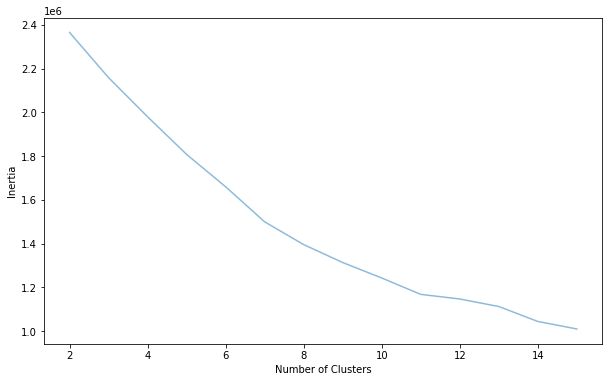

In [ ]:
min_range = 2
max_range = 16

inertia = []
k_list = range(min_range, max_range)

for k in k_list:
    km = KMeans(n_clusters = k, random_state= 0)
    km.fit(feat_norm) 
    score = km.inertia_
    inertia.append(score)


plt.figure(1 , figsize = (10 ,6))
# plt.plot(np.arange(min_range , max_range) , inertia , 'o')
plt.plot(np.arange(min_range , max_range) , inertia , '-' , alpha = 0.5)

plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

**Auto Find K**

Source: https://jtemporal.com/kmeans-and-elbow-method/

In [ ]:
def calculate_wcss(data):
    wcss = []
    for n in range(min_range, max_range):
        kmeans = KMeans(n_clusters=n,random_state=0)
        kmeans.fit(feat_norm)
        wcss.append(kmeans.inertia_)
    
    return wcss

from math import sqrt

def optimal_number_of_clusters(wcss):
    x1, y1 = min_range, wcss[0]
    x2, y2 = max_range, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2
    

# calculating the within clusters sum-of-squares for n cluster amounts
sum_of_squares = calculate_wcss(feat_norm)
    
# calculating the optimal number of clusters
n = optimal_number_of_clusters(sum_of_squares)
print('Number fo cluster =', n)

Number fo cluster = 8


In [ ]:
# Finding Elbow with Silhouette
from sklearn.metrics import silhouette_score

sil = []
kmax = 15

for k in range(4, kmax+1):
    print(k)
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(feat_norm)
    labels = kmeans.labels_
    sil.append(silhouette_score(feat_norm, labels, metric = 'euclidean'))

4
5
6
7
8
9
10
11
12
13
14
15


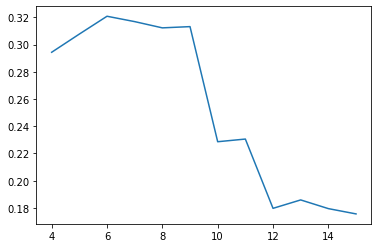

In [ ]:
cluster = list(range(4, kmax+1))
plt.plot(cluster, sil)
plt.show()

**K-mean Algorlithm**

In [ ]:
number_of_clusters = n

km = KMeans(n_clusters=number_of_clusters, random_state=0)
km.fit(feat_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
result = feat.copy()
result['cluster'] = km.predict(feat_norm)

In [ ]:
result

,all_shops_amount_avg,all_shops_amount_total,all_shops_distance_avg,all_shops_distance_max,all_shops_distance_min,all_shops_price_avg,all_shops_quantity_avg,all_shops_quantity_total,shop_id1_amount_avg,shop_id1_amount_total,shop_id1_cnt_txn_total,shop_id1_distance_avg,shop_id1_price_avg,shop_id1_quantity_avg,shop_id1_quantity_total,shop_id2_amount_avg,shop_id2_amount_total,shop_id2_cnt_txn_total,shop_id2_distance_avg,shop_id2_price_avg,shop_id2_quantity_avg,shop_id2_quantity_total,shop_id3_amount_avg,shop_id3_amount_total,shop_id3_cnt_txn_total,shop_id3_distance_avg,shop_id3_price_avg,shop_id3_quantity_avg,shop_id3_quantity_total,shop_id4_amount_avg,shop_id4_amount_total,shop_id4_cnt_txn_total,shop_id4_distance_avg,shop_id4_price_avg,shop_id4_quantity_avg,shop_id4_quantity_total,shop_id5_amount_avg,shop_id5_amount_total,shop_id5_cnt_txn_total,shop_id5_distance_avg,shop_id5_price_avg,shop_id5_quantity_avg,shop_id5_quantity_total,shop_used,cluster
0,711.08,"377,585.05","1,434.92","4,082.52",985.88,157.52,5.82,3090,522.06,"40,198.40",77.00,"4,082.52",319.67,1.42,109.00,743.14,"337,386.65",454.00,985.88,130.02,6.57,"2,981.00",0.00,0.00,0.00,"2,372.10",0.00,0.00,0.00,0.00,0.00,0.00,"4,929.80",0.00,0.00,0.00,0.00,0.00,0.00,"3,284.39",0.00,0.00,0.00,2.00,4
1,561.80,"391,010.95",909.77,"2,295.48",254.95,109.57,6.48,4508,188.10,"19,750.20",105.00,"1,115.34",142.56,1.43,150.00,242.44,"42,426.30",175.00,"2,295.48",100.49,2.69,470.00,127.33,"2,546.60",20.00,670.90,102.97,1.45,29.00,0.00,0.00,0.00,"2,048.06",0.00,0.00,0.00,823.96,"326,287.85",396.00,254.95,105.17,9.74,"3,859.00",4.00,0
2,272.65,"89,430.65","1,498.95","2,831.77",754.30,112.95,2.48,814,187.85,"6,011.30",32.00,"1,418.83",171.33,1.12,36.00,280.26,"29,146.95",104.00,"2,831.77",123.93,2.24,233.00,96.17,"1,250.20",13.00,"1,286.82",96.17,1.00,13.00,0.00,0.00,0.00,"1,545.20",0.00,0.00,0.00,296.21,"53,022.20",179.00,754.30,97.35,2.97,532.00,4.00,1
3,298.85,"83,976.00",561.66,"2,210.38",362.79,130.71,2.31,648,249.87,"4,997.40",20.00,"1,104.38",249.87,1.00,20.00,134.42,672.10,5.00,"2,210.38",134.42,1.00,5.00,251.46,"31,432.40",125.00,617.29,104.16,2.33,291.00,0.00,0.00,0.00,"2,181.69",0.00,0.00,0.00,357.82,"46,874.10",131.00,362.79,137.72,2.53,332.00,4.00,1
4,89.61,896.10,605.36,"1,375.12",275.47,84.60,1.30,13,0.00,0.00,0.00,"1,913.76",0.00,0.00,0.00,48.38,145.15,3.00,"1,375.12",31.68,2.00,6.00,107.28,750.95,7.00,275.47,107.28,1.00,7.00,0.00,0.00,0.00,"2,961.30",0.00,0.00,0.00,0.00,0.00,0.00,"1,172.38",0.00,0.00,0.00,2.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60360,179.45,"26,737.35","4,760.89","5,965.67","2,816.33",107.76,1.64,245,173.83,"15,992.05",92.00,"5,965.67",111.47,1.71,157.00,188.51,"10,745.30",57.00,"2,816.33",101.79,1.54,88.00,0.00,0.00,0.00,"4,433.45",0.00,0.00,0.00,0.00,0.00,0.00,"7,124.99",0.00,0.00,0.00,0.00,0.00,0.00,"5,338.82",0.00,0.00,0.00,2.00,3
60361,415.32,"110,475.10","1,168.95","1,168.95","1,168.95",133.15,4.04,1075,415.32,"110,475.10",266.00,"1,168.95",133.15,4.04,"1,075.00",0.00,0.00,0.00,"4,000.78",0.00,0.00,0.00,0.00,0.00,0.00,"2,373.71",0.00,0.00,0.00,0.00,0.00,0.00,429.33,0.00,0.00,0.00,0.00,0.00,0.00,"1,467.53",0.00,0.00,0.00,1.00,1
60362,150.64,"1,205.10",938.86,938.86,938.86,116.11,1.25,10,150.64,"1,205.10",8.00,938.86,116.11,1.25,10.00,0.00,0.00,0.00,"2,375.33",0.00,0.00,0.00,0.00,0.00,0.00,785.65,0.00,0.00,0.00,0.00,0.00,0.00,"2,044.90",0.00,0.00,0.00,0.00,0.00,0.00,247.79,0.00,0.00,0.00,1.00,1
60363,425.02,"22,100.80","1,727.25","1,727.25","1,727.25",356.19,1.42,74,425.02,"22,100.80",52.00,"1,727.25",356.19,1.42,74.00,0.00,0.00,0.00,"1,846.59",0.00,0.00,0.00,0.00,0.00,0.00,"1,124.24",0.00,0.00,0.00,0.00,0.00,0.00,"3,185.13",0.00,0.00,0.00,0.00,0.00,0.00,"1,456.62",0.00,0.00,0.00,1.00,1


In [ ]:
result['cluster'].value_counts()

1    38559
2     7593
4     5468
3     4855
5     2160
0      938
7      715
6       77
Name: cluster, dtype: int64

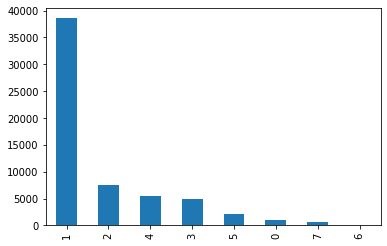

In [ ]:
result.cluster.value_counts().plot.bar()

In [ ]:
condition = 1

filter_cluster_df = result.loc[result['cluster']==condition]
filter_cluster_df[['shop_id1_amount_avg', 'shop_id1_distance_avg', 'shop_id1_price_avg', 'shop_id1_quantity_avg', 'cluster']]

,shop_id1_amount_avg,shop_id1_distance_avg,shop_id1_price_avg,shop_id1_quantity_avg,cluster
2,187.85,"1,418.83",171.33,1.12,1
3,249.87,"1,104.38",249.87,1.00,1
4,0.00,"1,913.76",0.00,0.00,1
6,124.10,"2,068.84",117.76,1.05,1
13,197.43,"2,788.38",169.95,1.20,1
...,...,...,...,...,...
60359,175.09,"1,280.16",127.00,1.47,1
60361,415.32,"1,168.95",133.15,4.04,1
60362,150.64,938.86,116.11,1.25,1
60363,425.02,"1,727.25",356.19,1.42,1


# Visualization

## PCA

In [ ]:
# จำนวน feature หรือจำนวนมิติ ของ feature 

print('Feature dimension', len(feat_norm.columns))

Feature dimension 44


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# reduce dimension

pca = PCA(n_components=2)
pca_feat = pca.fit_transform(feat_norm)

In [ ]:
pca_feat

array([[ 0.69793329, -3.62572785],
       [ 6.8263297 ,  6.29682494],
       [ 1.05571753,  3.17439321],
       ...,
       [-1.8564672 ,  2.73131678],
       [-2.09811188,  1.4346814 ],
       [-2.12727627,  2.47608899]])

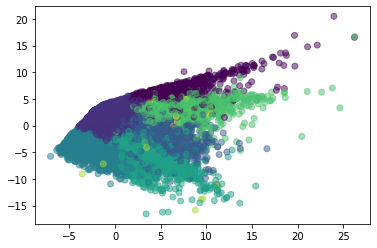

<Figure size 1440x1440 with 0 Axes>

In [ ]:
plt.scatter(x=pca_feat[:,0], y=pca_feat[:,1], c=result['cluster'], alpha=0.5)
plt.figure(figsize=(20,20))
plt.show()

In [ ]:
avg_cluster = result.groupby(by='cluster').mean()
avg_cluster.reset_index(inplace=True)
avg_cluster

,cluster,all_shops_amount_avg,all_shops_amount_total,all_shops_distance_avg,all_shops_distance_max,all_shops_distance_min,all_shops_price_avg,all_shops_quantity_avg,all_shops_quantity_total,shop_id1_amount_avg,shop_id1_amount_total,shop_id1_cnt_txn_total,shop_id1_distance_avg,shop_id1_price_avg,shop_id1_quantity_avg,shop_id1_quantity_total,shop_id2_amount_avg,shop_id2_amount_total,shop_id2_cnt_txn_total,shop_id2_distance_avg,shop_id2_price_avg,shop_id2_quantity_avg,shop_id2_quantity_total,shop_id3_amount_avg,shop_id3_amount_total,shop_id3_cnt_txn_total,shop_id3_distance_avg,shop_id3_price_avg,shop_id3_quantity_avg,shop_id3_quantity_total,shop_id4_amount_avg,shop_id4_amount_total,shop_id4_cnt_txn_total,shop_id4_distance_avg,shop_id4_price_avg,shop_id4_quantity_avg,shop_id4_quantity_total,shop_id5_amount_avg,shop_id5_amount_total,shop_id5_cnt_txn_total,shop_id5_distance_avg,shop_id5_price_avg,shop_id5_quantity_avg,shop_id5_quantity_total,shop_used
0,0,638.94,"443,181.53",767.00,"2,056.43",408.69,132.78,6.35,"4,321.30",378.67,"98,427.07",199.17,"1,107.22",221.93,2.20,744.32,142.70,"18,939.87",56.97,"2,550.00",95.44,1.05,162.35,95.77,"11,195.95",39.19,"1,053.05",58.01,0.91,111.92,31.73,"2,740.97",9.35,"1,939.79",21.85,0.28,26.74,766.32,"311,877.67",400.51,489.51,137.90,7.75,"3,275.96",3.22
1,1,300.19,"84,014.63","1,873.76","2,627.49","1,310.47",177.38,2.12,659.78,314.92,"53,293.13",150.14,"2,197.11",214.42,1.76,379.84,160.29,"22,879.17",74.68,"2,452.37",97.37,1.27,199.79,48.73,"3,993.37",17.26,"1,694.42",33.13,0.47,40.78,28.45,"1,863.15",7.79,"2,459.76",19.86,0.26,18.89,28.24,"1,985.80",9.08,"1,706.86",20.10,0.27,20.48,2.25
2,2,672.43,"523,483.07","1,990.41","2,880.88","1,196.83",175.58,5.56,"4,317.42",756.44,"464,258.22",601.98,"2,066.96",189.29,6.18,"3,777.22",213.76,"45,384.93",127.53,"2,534.11",113.19,1.78,398.56,73.45,"7,647.66",30.45,"1,695.22",47.02,0.73,78.27,33.73,"2,345.00",10.19,"2,447.92",24.46,0.31,23.33,44.46,"3,847.28",17.91,"1,656.28",31.47,0.44,40.04,2.79
3,3,374.91,"162,673.49","4,543.54","5,737.87","3,550.94",180.18,2.69,"1,273.75",371.48,"98,832.49",212.98,"5,422.15",219.83,2.22,726.11,246.27,"61,144.52",140.05,"4,181.03",114.33,1.95,520.66,26.19,"1,629.84",7.33,"4,847.84",19.81,0.25,16.27,15.00,530.92,2.56,"6,179.20",11.25,0.12,5.25,11.44,535.71,2.87,"5,229.68",9.00,0.11,5.46,2.08
4,4,755.40,"561,365.37","1,685.40","3,270.00",987.45,154.60,6.57,"4,851.24",377.18,"96,522.74",224.18,"3,237.19",232.23,2.19,706.56,956.36,"459,731.27",514.38,"1,177.34",227.29,7.77,"4,092.51",47.85,"3,828.34",16.92,"1,828.27",34.27,0.47,39.25,13.42,476.80,2.60,"4,096.60",11.36,0.11,4.71,16.65,806.22,4.18,"2,546.64",13.57,0.16,8.21,2.48
5,5,619.59,"456,901.36","1,073.43","2,072.74",534.18,137.57,6.03,"4,357.46",373.70,"109,235.82",229.55,"1,775.73",209.30,2.36,816.78,208.91,"36,129.60",99.01,"1,898.75",123.61,1.53,306.15,759.74,"305,989.59",396.04,662.76,138.53,7.65,"3,177.41",20.20,968.20,4.65,"2,630.45",15.83,0.18,9.60,58.85,"4,578.15",21.52,"1,079.73",42.91,0.57,47.52,3.22
6,6,"8,750.04","74,378.30","2,020.19","2,749.24","1,876.81","8,517.73",2.07,430.00,"16,346.84","28,182.89",2.10,"2,606.18","16,184.75",0.98,2.23,"1,390.67","22,976.49",32.75,"2,610.62","1,326.84",0.94,175.03,28.50,"7,384.74",12.17,"2,084.70",11.28,0.31,78.90,47.62,"15,488.33",17.61,"2,959.80",12.23,0.52,170.78,5.57,345.85,1.62,"2,181.26",3.96,0.07,3.06,1.62
7,7,711.92,"422,079.10","1,011.19","2,924.26",499.36,134.54,7.11,"4,111.94",379.92,"77,568.07",163.24,"1,674.34",254.10,1.93,581.33,130.11,"13,930.86",45.49,"4,149.83",91.64,0.83,113.14,42.95,"3,390.85",11.67,"2,629.38",30.98,0.35,32.49,990.92,"324,854.73",383.03,642.79,305.00,8.37,"3,361.90",27.45,"2,334.59",9.36,"1,854.87",20.57,0.26,23.08,2.77


In [ ]:
avg_cluster.columns

Index(['cluster', 'all_shops_amount_avg', 'all_shops_amount_total',
       'all_shops_distance_avg', 'all_shops_distance_max',
       'all_shops_distance_min', 'all_shops_price_avg',
       'all_shops_quantity_avg', 'all_shops_quantity_total',
       'shop_id1_amount_avg', 'shop_id1_amount_total',
       'shop_id1_cnt_txn_total', 'shop_id1_distance_avg', 'shop_id1_price_avg',
       'shop_id1_quantity_avg', 'shop_id1_quantity_total',
       'shop_id2_amount_avg', 'shop_id2_amount_total',
       'shop_id2_cnt_txn_total', 'shop_id2_distance_avg', 'shop_id2_price_avg',
       'shop_id2_quantity_avg', 'shop_id2_quantity_total',
       'shop_id3_amount_avg', 'shop_id3_amount_total',
       'shop_id3_cnt_txn_total', 'shop_id3_distance_avg', 'shop_id3_price_avg',
       'shop_id3_quantity_avg', 'shop_id3_quantity_total',
       'shop_id4_amount_avg', 'shop_id4_amount_total',
       'shop_id4_cnt_txn_total', 'shop_id4_distance_avg', 'shop_id4_price_avg',
       'shop_id4_quantity_avg', 'shop_i

In [ ]:
shop_amout = avg_cluster[['shop_id1_amount_total', 'shop_id2_amount_total', 'shop_id3_amount_total', 'shop_id4_amount_total', 'shop_id5_amount_total', 'cluster']]

shop_distance = avg_cluster[['shop_id1_distance_avg', 'shop_id2_distance_avg', 'shop_id3_distance_avg', 'shop_id4_distance_avg', 'shop_id5_distance_avg', 'cluster']]

In [ ]:
df = pd.melt(shop_amout, id_vars="cluster", var_name="shop_id", value_name="total")
df.sample(10)

,cluster,shop_id,total
9,1,shop_id2_amount_total,"22,879.17"
20,4,shop_id3_amount_total,"3,828.34"
15,7,shop_id2_amount_total,"13,930.86"
21,5,shop_id3_amount_total,"305,989.59"
3,3,shop_id1_amount_total,"98,832.49"
23,7,shop_id3_amount_total,"3,390.85"
17,1,shop_id3_amount_total,"3,993.37"
16,0,shop_id3_amount_total,"11,195.95"
31,7,shop_id4_amount_total,"324,854.73"
36,4,shop_id5_amount_total,806.22


[]

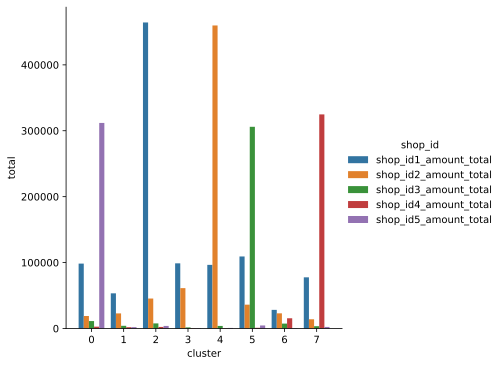

In [ ]:
# Plot bar chart for clustering
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_formats = ['svg']

sns.catplot(x='cluster', y='total', hue='shop_id', data=df, kind='bar')
plt.plot()

## Radar chart

In [ ]:
from math import pi

def plot_radar_df(df, feat_cols, label_col, selected_label_list, split_chart=False, dpi=100, n_cols = 3, fig_h=8, fig_w=8):
    
    # min-max normalization
    for col in feat_cols:
        df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
    
    # select data:
    row_idx = df[label_col].isin(selected_label_list)
    data = df[row_idx]
    data = data[feat_cols].values

    # number of variable
    N = len(feat_cols)

    # angle of each axis in the plot
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # set color
    my_color = plt.cm.get_cmap("Set2", len(df.index))

    # set font size and subplot
    if not split_chart:
        ax = plt.subplot(111, polar=True )
        size = 10
    else:
        size = 5
        dpi = 1.5*dpi

    for i in range(len(data)):

        title = label_col +'_' +str(selected_label_list[i])

        # Initialise the spider plot
        if split_chart:
            n_rows = np.ceil(len(df)/n_cols)
            ax = plt.subplot(n_rows,n_cols,i+1, polar=True )

        # If you want the first axis to be on top:
        ax.set_theta_offset(pi / 2)
        ax.set_theta_direction(-1)

        # Draw one axe per variable + add labels labels yet
        plt.xticks(angles[:-1], feat_cols, color='grey', size=int(size*0.8))

        # Draw ylabels
        ax.set_rlabel_position(0)
        plt.yticks([0.20, 0.4, 0.6, 0.8,  1], \
                   ["20%","40%","60%","80%","100%"], color="grey", size=size)
        plt.ylim(0,1)

        # Plot
        values = list(data[i,:])
        values += values[:1]
        ax.plot(angles, values, color=my_color(i), linewidth=2, linestyle='solid', label=title)
        ax.fill(angles, values, color=my_color(i), alpha=0.4)

        # Add a title or legend
        if split_chart:
            plt.title(title, size=11, color=my_color(i), y=1.2)
        else:
            plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))

        # Adjust DPI
        fig = plt.gcf()
        fig.set_dpi(dpi)
        fig.set_figheight(fig_h)
        fig.set_figwidth(fig_w)

    plt.tight_layout()
    plt.show()

In [ ]:
avg_cluster.columns

Index(['cluster', 'all_shops_amount_avg', 'all_shops_amount_total',
       'all_shops_distance_avg', 'all_shops_distance_max',
       'all_shops_distance_min', 'all_shops_price_avg',
       'all_shops_quantity_avg', 'all_shops_quantity_total',
       'shop_id1_amount_avg', 'shop_id1_amount_total',
       'shop_id1_cnt_txn_total', 'shop_id1_distance_avg', 'shop_id1_price_avg',
       'shop_id1_quantity_avg', 'shop_id1_quantity_total',
       'shop_id2_amount_avg', 'shop_id2_amount_total',
       'shop_id2_cnt_txn_total', 'shop_id2_distance_avg', 'shop_id2_price_avg',
       'shop_id2_quantity_avg', 'shop_id2_quantity_total',
       'shop_id3_amount_avg', 'shop_id3_amount_total',
       'shop_id3_cnt_txn_total', 'shop_id3_distance_avg', 'shop_id3_price_avg',
       'shop_id3_quantity_avg', 'shop_id3_quantity_total',
       'shop_id4_amount_avg', 'shop_id4_amount_total',
       'shop_id4_cnt_txn_total', 'shop_id4_distance_avg', 'shop_id4_price_avg',
       'shop_id4_quantity_avg', 'shop_i

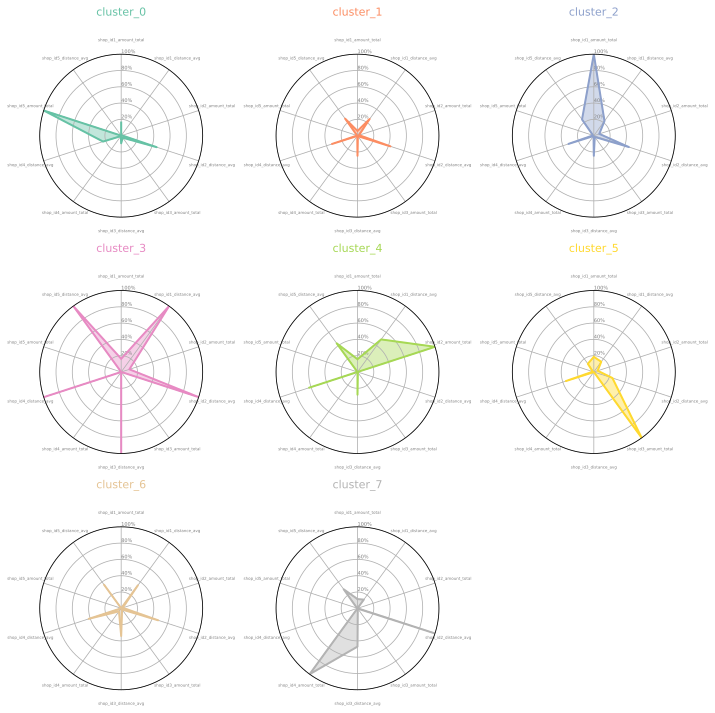

In [ ]:
# feat_cols = [
#        'shop_id1_amount_total', 'shop_id1_distance_avg', 'shop_id1_price_avg', 'shop_id1_quantity_avg',      
#        'shop_id2_amount_total', 'shop_id2_distance_avg', 'shop_id2_price_avg', 'shop_id2_quantity_avg',        
#        'shop_id3_amount_total', 'shop_id3_distance_avg', 'shop_id3_price_avg','shop_id3_quantity_avg',       
#        'shop_id4_amount_total', 'shop_id4_distance_avg', 'shop_id4_price_avg','shop_id4_quantity_avg',       
#        'shop_id5_amount_total', 'shop_id5_distance_avg', 'shop_id5_price_avg','shop_id5_quantity_avg', 
#        ]

feat_cols = [
       'shop_id1_amount_total',  'shop_id1_distance_avg',      
       'shop_id2_amount_total', 'shop_id2_distance_avg',      
       'shop_id3_amount_total', 'shop_id3_distance_avg',      
       'shop_id4_amount_total', 'shop_id4_distance_avg',      
       'shop_id5_amount_total', 'shop_id5_distance_avg',
       ]

label_col = 'cluster'
selected_label_list = [i for i in range(8)]

plot_radar_df(avg_cluster, feat_cols, label_col, selected_label_list, split_chart=True, dpi=200, n_cols=3, fig_h=10, fig_w=10)

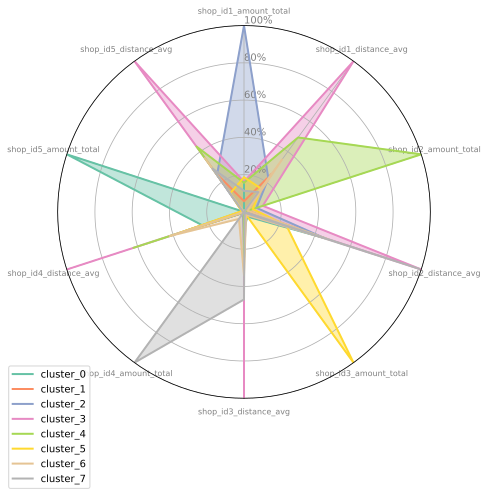

In [ ]:
label_col = 'cluster'
selected_label_list = [i for i in range(8)]

plot_radar_df(avg_cluster, feat_cols, label_col, selected_label_list, split_chart=False, dpi=150, n_cols=3, fig_h=7, fig_w=7)